In [5]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
from sklearn.model_selection import train_test_split
import scipy as sc
import pandas as pd

price_data = pd.read_csv("../../price_filled2.csv", sep = ";")

tab_price = price_data.to_numpy()[:,3:]
dates_tab = price_data.columns[2:].to_numpy(dtype = np.str)
tab_price.shape


current_month = dates_tab[0][:-3]
# print(current_month)
month_first_index = {current_month : 0}

for i in range(len(dates_tab)) :
    if (dates_tab[i][-4] != current_month[-1]) :
        current_month = dates_tab[i][:-3]
        month_first_index[current_month] = i
#     print(dates_tab[i][-4], current_month[-1])


indexes = np.array(list(month_first_index.values()))
total = []
for i in range(len(month_first_index)-1) :
    X = tab_price[:,indexes[i]:indexes[i+1]].mean(axis = 1)
    total.append(X)
total.append(tab_price[:,indexes[-1]:].mean(axis = 1))
result = np.column_stack(total)
n_data = result.shape[1]

IPC_df = pd.read_csv("../../valeurs_mensuelles.csv", sep = ";")
dates = IPC_df["Libellé"].to_numpy()[3:]
dates = dates[::-1].copy()

IPC = IPC_df[IPC_df.columns[1]].iloc[3:].to_numpy(dtype = np.float)[::-1]

IPC_selec = IPC[-n_data:]

X = result.copy()
X0 = np.transpose(X) #juste les données de base
X1 = np.transpose(np.vstack((X[:,1:], IPC_selec[:-1]))) #on donne en plus le point t-1
X2 = np.transpose(np.vstack((np.transpose(X1)[:,1:], IPC_selec[:-2]))) #on donne en plus le point t-2

Y0 = IPC_selec
Y1 = IPC_selec[1:]
Y2 = IPC_selec[2:]

print(X0.shape)




(89, 756)


In [6]:
from sklearn.preprocessing import StandardScaler


#no value 

scaler0 = StandardScaler()
X0_std = scaler0.fit_transform(X0)

stddv_Y0 = Y0.std()
mean_Y0 = Y0.mean()

scaler01 = StandardScaler()
Y0_std = scaler01.fit_transform(Y0.reshape(-1, 1))
stddv_Y0_std = Y0_std.std()
mean_Y0_std = Y0_std.mean()


## t-1 value

scaler1 = StandardScaler()
X1_std = scaler1.fit_transform(X1)

stddv_Y1 = Y1.std()
mean_Y1 = Y1.mean()

scaler11 = StandardScaler()
Y1_std = scaler11.fit_transform(Y1.reshape(-1, 1))
stddv_Y1_std = Y1_std.std()
mean_Y1_std = Y1_std.mean()

## t-1 and t-2 values

scaler2 = StandardScaler()
X2_std = scaler2.fit_transform(X2)

stddv_Y2 = Y2.std()
mean_Y2 = Y2.mean()

scaler21 = StandardScaler()
Y2_std = scaler21.fit_transform(Y2.reshape(-1, 1))
stddv_Y2_std = Y2_std.std()
mean_Y2_std = Y2_std.mean()

np.ravel(Y2_std).shape

(87,)

In [7]:

from sklearn.decomposition import PCA

pca = PCA(n_components=80)
X1_std_pca = pca.fit_transform(X1_std)
X1_std_pca

X1_std_pca.shape



Xtrain, Xtest, Ytrain, Ytest = train_test_split(X1_std_pca, Y1_std, test_size = .2)
# Xtrain = Xtrain.T
# Xtest = Xtest.T

In [8]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression(fit_intercept=False).fit(Xtrain, Ytrain)
print("test : ", reg.score(Xtest, Ytest))
print("train : ", reg.score(Xtrain, Ytrain))

test :  0.931287164731175
train :  1.0


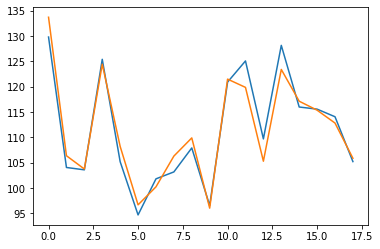

In [11]:
ypredicted = reg.predict(Xtest)

plt.figure()
plt.plot(ypredicted*stddv_Y1 + mean_Y1)
plt.plot(Ytest*stddv_Y1 + mean_Y1)
plt.show()

In [16]:
def cout(predict, obs) :
    S = 0
    for i in range(len(obs)) :
        S += (predict[i] - obs[i])**2
    return (S**.5)/len(obs)

In [18]:
cout(ypredicted*stddv_Y1 + mean_Y1, Ytest*stddv_Y1 + mean_Y1)

array([0.61836125])

In [24]:
X[:,-1]

array([1.8, 2.3, 1.2, 3.0, 3.3, 1.6, 3.25, 3.1975, 1.3, 3.4, 4.0, 1.5,
       4.5, 1.4, 1.7, 1.1, 1.3, 1.4, 2.0, 2.2, 2.5, 2.6, 1.3, 1.5, 1.6,
       2.1, 3.8, 3.5, 4.5, 3.8, 3.5, 3.8, 4.5, 6.5, 3.0, 4.7, 4.0, 4.2,
       5.5, 4.2, 3.8, 2.4, 2.6, 3.3, 1.25, 1.25, 1.8, 2.6, 2.5, 3.0, 2.5,
       4.0, 5.0, 20.0, 13.5, 0.95, 1.0, 1.5, 1.7, 5.0, 5.075, 7.625, 4.5,
       6.075, 1.5, 7.25, 6.8, 7.2, 4.2, 4.2, 6.65, 9.0, 8.5, 8.5, 4.5,
       6.0, 1.5, 0.975, 1.15, 1.1, 5.0, 17.0, 17.0, 20.0, 20.0, 23.0,
       22.0, 21.5, 20.5, 2.5, 9.5, 6.5, 1.0, 0.9750000000000001, 1.15,
       1.7725, 1.4, 1.9, 1.9, 1.1, 0.85, 1.4, 0.65, 0.7, 1.1, 0.85, 1.0,
       3.0, 2.2, 2.8, 3.0, 4.0, 5.5, 9.75, 2.6, 13.25, 2.6, 4.0, 6.0, 6.0,
       3.0, 4.0, 1.9, 11.0, 10.0, 11.5, 11.5, 11.5, 11.5, 1.3375, 1.4,
       3.0, 8.0, 10.0, 8.0, 13.625, 0.7, 0.6, 0.7, 0.6, 9.0, 7.5, 1.6,
       1.7, 1.15, 1.0, 1.3, 1.6, 1.4, 1.4, 1.5, 1.2, 1.15, 1.0, 2.3, 1.7,
       1.2, 2.8, 1.2, 0.95, 1.3, 3.2, 4.0, 3.5, 1.7, 1.15, 1.